Maj 2015, J. Slavič in L. Knez

In [2]:
# Uvozimo potrebne module

from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Vprašanje 1: Na sliki (vir: Numerical Methods in Engineering With Python 3, 3rd Ed, Jaan Kiusalaas) je prikazan izstrelek mase $m$, ki ga izstrelimo s hitrosjo $v_0$ pod kotom $\alpha$. Če je sila upora zraka: $F=c\,v^{3/2}$, potem sta gibalni enačbi:
$$\ddot x(t)=-F\,\cos(\alpha)/m\qquad\ddot y(t)=-F\,\sin(\alpha)/m-g.$$
Opomba: $v=\sqrt{\dot x^2+\dot y^2}.$ Ustrezne parametre si izmislite.
<img src="../fig/Jaan_Kiusalaas_stran_265_n13.png" width=300>
Sistem dveh diferencialnih enačb drugega reda zapišite v sistem diferencialnih enačb prvega reda.

Glejte odgovor pod vprašanje 3.

Vprašanje 2: Določite vektor začetnih pogojev, ki smo ga zgoraj označili z $\mathbf{y}$.

In [3]:
# Paramatre si ustrezno izmislimo
v0=200
alpha = 30*np.pi/180
m = 1
dt = 0.01
y_zacetni_pogoji = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])

Vprašanje 3: Določite funkcijo prvih odvodov, ``c`` naj bo parameter.

Odgovor za vprašanji 1 in 3 smo združili. Sistem enačb zapišemo v funkcijo:

In [14]:
def F(t, y, c=0.5, m=1):
    # y = [x0, x1, y0, y1]
    g = 9.81
    v = np.sqrt(y[1]**2+y[3]**2)
    F = c*v**(3/2)
    a = np.arctan2(y[3],y[1])  # Kot dobimo iz razmerja hitrosti
    return np.array([y[1], - F*np.cos(a)/m, y[3], -F*np.sin(a)/m - g])  # Hitrosti in pospeski

Preverimo, če funkcija sistema diferencialnih enačb prvega reda deluje pravilno:

In [5]:
F(0, y_zacetni_pogoji) # Resitve: v0*cos(alpha), -F*cos(a)/m, v0*sin(alpha), -F*sin(a)/m-g

array([  173.20508076, -1224.74487139,   100.        ,  -716.91678119])

Vprašanje 4: Definirajte začetne pogoje in rešite nalogo s poljubnimi podatki.

Začetne pogoje smo že definirali pri vprašanju 2. Sedaj še rešimo nalogo.

In [6]:
from scipy.integrate import ode

In [7]:
#%%timeit -n 1
solver = ode(F).set_integrator('dopri5').set_initial_value(y_zacetni_pogoji)  # Nagrajeni Runge-Kutta
solver.set_f_params(.5)
t_RK4_sci = [0]
x_RK4_sci = [y_zacetni_pogoji]
while solver.successful() and solver.y[2] >= 0:
    solver.integrate(solver.t+dt)
    t_RK4_sci.append(solver.t)
    x_RK4_sci.append(solver.y)
t_RK4_sci = np.array(t_RK4_sci)
x_RK4_sci = np.array(x_RK4_sci)

Vprašanje 5: Prikažite $(x, y)$ lego masne točke, spreminjajte koeficient upora $c$.

Izrišemo rešitev iz vprašanja 4:

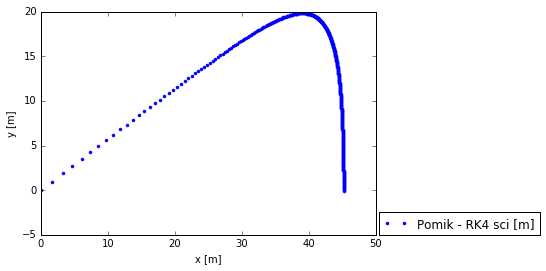

In [8]:
plt.plot(x_RK4_sci[:, 0], x_RK4_sci[:, 2], 'b.', label='Pomik - RK4 sci [m]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(loc=(1.01, 0));

Sedaj pa napišimo funkcijo ki bo izrisala rešitve za različne parametre $c$:

In [9]:
def resitev_SDE(F, y_zacetni_pogoji, dt, c):
    solver = ode(F).set_integrator('dopri5').set_initial_value(y_zacetni_pogoji)
    solver.set_f_params(c)
    t_RK4_sci = [0]
    x_RK4_sci = [y_zacetni_pogoji]
    while solver.successful() and solver.y[2] >= 0:
        solver.integrate(solver.t+dt)
        t_RK4_sci.append(solver.t)
        x_RK4_sci.append(solver.y)
    t_RK4_sci = np.array(t_RK4_sci)
    x_RK4_sci = np.array(x_RK4_sci)
    plt.plot(x_RK4_sci[:, 0], x_RK4_sci[:, 2], label='c = '+'$'+latex(c)+'$')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.legend();
    return 

Izrišimo nekaj rešitev:

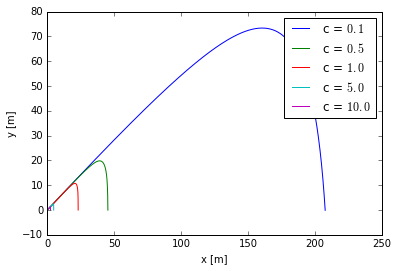

In [10]:
podatki = np.asarray([0.1, 0.5, 1, 5, 10])

for c in podatki:
    resitve = resitev_SDE(F, y_zacetni_pogoji, dt, c)

Vprašanje 6: Prikažite hitrost v odvisnosti od časa. Določite minimum hitrosti in čas pri katerem nastane.

Izrišemo hitrost v odvisnosti od časa. Uporabimo rešitve iz vprašanja 4.

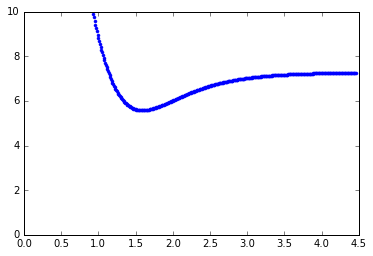

In [11]:
hitrost = np.sqrt(x_RK4_sci[:, 1]**2+ x_RK4_sci[:, 3]**2)   # Formulo za hitrost smo razbrali iz vprašanja 1
plt.plot(t_RK4_sci, hitrost, 'b.', label='Hitrost - RK4 sci [m/s]');
plt.ylim(0,10);

Najmanjšo hitrost poiščemo iz vektorja hitrosti s pomočjo funkcije ``np.min``:

In [12]:
np.min(hitrost)

Čas najmanjše hitrosti dobimo tako, da poiščemo na katerem mestu v vektorju hitrosti se pojavi najmanjša hitrost. Nato samo še odčitamo pripadajoči čas iz časovnega vektorja.

In [13]:
t_RK4_sci[np.argmin(hitrost)]